In [3]:
from sympy import symbols, lambdify, diff, cos, roots
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [4]:
def eq1(x):
    return (61*x**7+494*x**6+680*x**5-636*x**4-777*x**3+420*x**2+69*x-16)

def eq2(x):
    return x**0.5 - cos(0.387*x)

In [5]:
inter_of_roots = [[0, 0] for i in range(7)]
t=-13.8
i = 0
while t<3.4:
    if eq1(t)*eq1(t+0.1)<0:
        inter_of_roots[i] = [t, t+0.1]
        i += 1
    print('в точці', t, 'функція набуває значення', eq1(t))
    t =t+0.1
inter_of_roots

в точці -13.8 функція набуває значення -2763450230.9805956
в точці -13.700000000000001 функція набуває значення -2607779910.319297
в точці -13.600000000000001 функція набуває значення -2459617733.293725
в точці -13.500000000000002 функція набуває значення -2318661918.46094
в точці -13.400000000000002 функція набуває значення -2184620397.385897
в точці -13.300000000000002 функція набуває значення -2057210579.7799075
в точці -13.200000000000003 функція набуває значення -1936159122.4338727
в точці -13.100000000000003 функція набуває значення -1821201701.9155369
в точці -13.000000000000004 функція набуває значення -1712082791.0000038
в точці -12.900000000000004 функція набуває значення -1608555438.802785
в точці -12.800000000000004 функція набуває значення -1510381054.5846312
в точці -12.700000000000005 функція набуває значення -1417329195.1974065
в точці -12.600000000000005 функція набуває значення -1329177356.1402538
в точці -12.500000000000005 функція набуває значення -1245710766.195316

в точці 0.699999999999967 функція набуває значення -3.6847817000002436
в точці 0.799999999999967 функція набуває значення 14.784563199986003
в точці 0.8999999999999669 функція набуває значення 95.8285648999574
в точці 0.9999999999999669 функція набуває значення 294.9999999999065
в точці 1.099999999999967 функція набуває значення 691.9150770998251
в точці 1.199999999999967 функція набуває значення 1395.8421247997028
в точці 1.2999999999999672 функція набуває значення 2551.953399699527
в точці 1.3999999999999673 функція набуває значення 4348.270758399282
в точці 1.4999999999999674 функція набуває значення 7023.335937498953
в точці 1.5999999999999674 функція набуває значення 10874.636185598516
в точці 1.6999999999999675 функція набуває значення 16267.815991297955
в точці 1.7999999999999676 функція набуває значення 23646.705651197233
в точці 1.8999999999999677 функція набуває значення 33544.19742189634
в точці 1.9999999999999678 функція набуває значення 46593.99999999523
в точці 2.09999999

[[-6.100000000000028, -6.000000000000028],
 [-2.100000000000034, -2.0000000000000338],
 [-1.3000000000000331, -1.200000000000033],
 [-0.300000000000033, -0.200000000000033],
 [0.099999999999967, 0.199999999999967],
 [0.599999999999967, 0.699999999999967],
 [0.699999999999967, 0.799999999999967]]

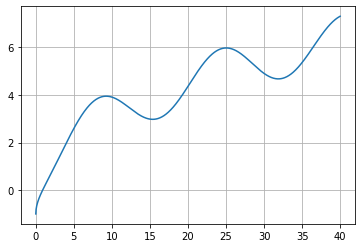

In [6]:
t=np.linspace(0.0001,40,1000)
plt.plot(t,t**0.5 - np.cos(0.387*t))
plt.grid()

In [7]:
inter_of_root = [0,0]
t = 0
while t<1:
    if eq2(t)*eq2(t+0.1)<0:
        inter_of_root[0] = t
        inter_of_root[1] = t + 0.15
    print('в точці', t, 'функція набуває значення', eq2(t))
    t =t+0.1
inter_of_root

в точці 0 функція набуває значення -1.00000000000000
в точці 0.1 функція набуває значення -0.683023482439969
в точці 0.2 функція набуває значення -0.549792519585015
в точці 0.30000000000000004 функція набуває значення -0.445545404473487
в точці 0.4 функція набуває значення -0.355586854999986
в точці 0.5 функція набуває значення -0.274230434378058
в точці 0.6 функція набуває значення -0.198565819344973
в точці 0.7 функція набуває значення -0.126870421244016
в точці 0.7999999999999999 функція набуває значення -0.0580283261504364
в точці 0.8999999999999999 функція набуває значення 0.00872901660447989
в точці 0.9999999999999999 функція набуває значення 0.0739545386958124


[0.7999999999999999, 0.95]

In [8]:
def bisec(a, b, eq, eps=0.00001):
    c = (a+b)*0.5
    if abs(b-a)<eps and abs(eq(c))<eps:
        print(f"Наближена відповідь = {c}")
        print("-"*50)
        return c
    else:
        print(f"Значення: а={a}, b={b}, c={c}.")
        if eq(a)*eq(c)<0:
            b=c
            return bisec(a, b, eq)
        else:
            a=c
            return bisec(a, b, eq)

In [9]:
def hord(a, b, eq, eps=0.00001):
    x = symbols('x')
    d2x = lambdify(x, diff(eq(x), x, 2))
    x = [0, 0]
    k = 0
    if d2x((a+b)*0.5)*eq(a)>0:
        x[0] = b 
        while abs(x[0]-x[1])> eps or abs(eq(x[0]))> eps:
            x[1] = x[0] - eq(x[0])*(x[0]-a)/(eq(x[0])-eq(a))
            print(f"x{k}={x[0]}, x{k+1}={x[1]}")
            x[0] = x[1]
            k += 1
    else:
        x[0] = a
        while abs(x[0]-x[1])> 0.00001 or abs(eq(x[0]))> 0.00001:
            x[1] = x[0] - eq(x[0])*(x[0]-b)/(eq(x[0])-eq(b))
            print(f"x{k}={x[0]}, x{k+1}={x[1]}")
            x[0] = x[1]
            k += 1
    print("-"*50)
    return x[0]   

In [10]:
def neuton(a, b, eq, eps=0.00001):
    k = 0 
    x = symbols('x')
    d1x = lambdify(x, diff(eq(x), x, 1))
    d2x = lambdify(x, diff(eq(x), x, 2))
    x = [0, 0]
    for t in np.linspace(a, b, 10):
        if eq(t)*d2x(t)>0:
            x[0] = t
            break
    while abs(x[0]-x[1])> eps or abs(eq(x[0]))> eps:
            x[1] = x[0] - eq(x[0])/d1x(float(x[0]))
            print(f"x{k}={x[0]}, x{k+1}={x[1]}, f(X)={eq(x[1])}")
            x[0] = x[1]
            k += 1
    print("-"*50)
    return x[0]   

In [11]:
approx_roots = [0]*7
i = 0
for inter in inter_of_roots:
    approx_roots[i] = bisec(inter[0], inter[1], eq1)
    i += 1

Значення: а=-6.100000000000028, b=-6.000000000000028, c=-6.050000000000028.
Значення: а=-6.050000000000028, b=-6.000000000000028, c=-6.025000000000029.
Значення: а=-6.025000000000029, b=-6.000000000000028, c=-6.012500000000029.
Значення: а=-6.025000000000029, b=-6.012500000000029, c=-6.018750000000029.
Значення: а=-6.025000000000029, b=-6.018750000000029, c=-6.021875000000029.
Значення: а=-6.025000000000029, b=-6.021875000000029, c=-6.023437500000028.
Значення: а=-6.025000000000029, b=-6.023437500000028, c=-6.024218750000029.
Значення: а=-6.024218750000029, b=-6.023437500000028, c=-6.023828125000028.
Значення: а=-6.023828125000028, b=-6.023437500000028, c=-6.023632812500028.
Значення: а=-6.023828125000028, b=-6.023632812500028, c=-6.023730468750028.
Значення: а=-6.023828125000028, b=-6.023730468750028, c=-6.023779296875028.
Значення: а=-6.023828125000028, b=-6.023779296875028, c=-6.023803710937528.
Значення: а=-6.023803710937528, b=-6.023779296875028, c=-6.023791503906278.
Значення: а=

In [12]:
approx_roots_1 = [0]*7
i = 0
for inter in inter_of_roots:
    approx_roots_1[i] = hord(inter[0], inter[1], eq1)
    i += 1

x0=-6.000000000000028, x1=-6.021876957759354
x1=-6.021876957759354, x2=-6.023646788559536
x2=-6.023646788559536, x3=-6.023787945110595
x3=-6.023787945110595, x4=-6.023799190453797
x4=-6.023799190453797, x5=-6.023800086240712
x5=-6.023800086240712, x6=-6.023800157597215
x6=-6.023800157597215, x7=-6.023800163281319
x7=-6.023800163281319, x8=-6.023800163734105
x8=-6.023800163734105, x9=-6.023800163770172
--------------------------------------------------
x0=-2.0000000000000338, x1=-2.075091100401417
x1=-2.075091100401417, x2=-2.0796766426907336
x2=-2.0796766426907336, x3=-2.0799194771974263
x3=-2.0799194771974263, x4=-2.0799322308277057
x4=-2.0799322308277057, x5=-2.079932900353558
x5=-2.079932900353558, x6=-2.079932935500773
x6=-2.079932935500773, x7=-2.0799329373458484
--------------------------------------------------
x0=-1.200000000000033, x1=-1.2768365435744993
x1=-1.2768365435744993, x2=-1.279055346964997
x2=-1.279055346964997, x3=-1.2791098845048752
x3=-1.2791098845048752, x4=-1.27

In [13]:
approx_roots_2 = [0]*7
i = 0
for inter in inter_of_roots:
    approx_roots_2[i] = neuton(inter[0], inter[1], eq1)
    i += 1


x0=-6.100000000000028, x1=-6.02960196792181, f(X)=-10716.529992130552
x1=-6.02960196792181, x2=-6.023836824714917, f(X)=-67.28975846388528
x2=-6.023836824714917, x3=-6.023800165247972, f(X)=-0.0027066047044854713
x3=-6.023800165247972, x4=-6.023800163773295, f(X)=-4.418382104631746e-09
--------------------------------------------------
x0=-2.100000000000034, x1=-2.0809512094793736, f(X)=6.173235855536376
x1=-2.0809512094793736, x2=-2.0799357379579093, f(X)=0.016931335012912996
x2=-2.0799357379579093, x3=-2.0799329374693327, f(X)=1.285415578422544e-07
--------------------------------------------------
x0=-1.3000000000000331, x1=-1.2796006366464394, f(X)=-0.6500499765991776
x1=-1.2796006366464394, x2=-1.2791115444642283, f(X)=-0.00038795422361204146
x2=-1.2791115444642283, x3=-1.279111252221809, f(X)=-1.3807266441290267e-10
--------------------------------------------------
x0=-0.300000000000033, x1=-0.2485199582827393, f(X)=1.7606215629458006
x1=-0.2485199582827393, x2=-0.24100928450132

In [14]:
print(f"Рівняння 1: 61*x**7+494*x**6+680*x**5-636*x**4-777*x**3+420*x**2+69*x-16")
print("--------------------bisec----------------------hord-------------------neuton")
for i in range(7):
    print(f"Наближений корінь  x{i+1}= {approx_roots[i]}, {approx_roots_1[i]}, {approx_roots_2[i]}")

Рівняння 1: 61*x**7+494*x**6+680*x**5-636*x**4-777*x**3+420*x**2+69*x-16
--------------------bisec----------------------hord-------------------neuton
Наближений корінь  x1= -6.023800163774314, -6.023800163770172, -6.023800163773295
Наближений корінь  x2= -2.079932937026059, -2.0799329373458484, -2.0799329374693327
Наближений корінь  x3= -1.2791112542152738, -1.2791112514032692, -1.279111252221809
Наближений корінь  x4= -0.24083623886111696, -0.2408361813080724, -0.24083619488681224
Наближений корінь  x5= 0.14327659606930296, 0.1432766018319876, 0.1432766352713305
Наближений корінь  x6= 0.6344696044921545, 0.6344696537459624, 0.6344696100959258
Наближений корінь  x7= 0.747573661804166, 0.7475735859230346, 0.7475736438056595


In [13]:
approx_root = 0
approx_root = bisec(inter_of_root[0], inter_of_root[1], eq2)

Значення: а=0.7999999999999999, b=0.95, c=0.875.
Значення: а=0.875, b=0.95, c=0.9125.
Значення: а=0.875, b=0.9125, c=0.89375.
Значення: а=0.875, b=0.89375, c=0.884375.
Значення: а=0.884375, b=0.89375, c=0.8890625000000001.
Значення: а=0.884375, b=0.8890625000000001, c=0.88671875.
Значення: а=0.88671875, b=0.8890625000000001, c=0.887890625.
Значення: а=0.88671875, b=0.887890625, c=0.8873046875.
Значення: а=0.88671875, b=0.8873046875, c=0.88701171875.
Значення: а=0.88671875, b=0.88701171875, c=0.886865234375.
Значення: а=0.88671875, b=0.886865234375, c=0.8867919921875.
Значення: а=0.88671875, b=0.8867919921875, c=0.88675537109375.
Значення: а=0.88675537109375, b=0.8867919921875, c=0.8867736816406251.
Значення: а=0.8867736816406251, b=0.8867919921875, c=0.8867828369140626.
Наближена відповідь = 0.8867782592773439
--------------------------------------------------


In [14]:
approx_root_1 = 0
approx_root_1 = hord(inter_of_root[0], inter_of_root[1], eq2)

x0=0.95, x1=0.887450714469015
x1=0.887450714469015, x2=0.886784764105411
--------------------------------------------------


In [15]:
approx_root_2 = 0
approx_root_2 = neuton(inter_of_root[0], inter_of_root[1], eq2)

x0=0.7999999999999999, x1=0.885723134407707
x1=0.885723134407707, x2=0.886777057440289
--------------------------------------------------


In [16]:
print(f"Рівняння 2: x**0.5 - cos(0.387*x)")
print("--------------------bisec----------------------hord-------------------neuton")
print(f"Наближений корінь  x= {approx_root}, {approx_root_1}, {approx_root_2}")

Рівняння 2: x**0.5 - cos(0.387*x)
--------------------bisec----------------------hord-------------------neuton
Наближений корінь  x= 0.8867782592773439, 0.886784764105411, 0.886777057440289


In [23]:
x=symbols('x')
roots(eq1(x), x)

{}

In [27]:
roots_scipy = [0]*7

roots_scipy[0] = fsolve(eq1, -6)
roots_scipy[1] = fsolve(eq1, -2)
roots_scipy[2] = fsolve(eq1, -1)
roots_scipy[3] = fsolve(eq1, -0.2)
roots_scipy[4] = fsolve(eq1, 0.1)
roots_scipy[5] = fsolve(eq1, 0.6)
roots_scipy[6] = fsolve(eq1, 0.7)
print(f"Рівняння 1: 61*x**7+494*x**6+680*x**5-636*x**4-777*x**3+420*x**2+69*x-16")
for i in range(7):
    print(f"fsolve корінь  x{i+1}= {roots_scipy[i]}")

Рівняння 1: 61*x**7+494*x**6+680*x**5-636*x**4-777*x**3+420*x**2+69*x-16
fsolve корінь  x1= [-6.02380016]
fsolve корінь  x2= [-2.07993294]
fsolve корінь  x3= [-1.27911125]
fsolve корінь  x4= [-0.24083619]
fsolve корінь  x5= [0.14327664]
fsolve корінь  x6= [0.63446961]
fsolve корінь  x7= [0.74757364]


In [37]:
def eq(x):
    return x**0.5 - np.cos(0.387*x)

root2_scipy = 0
root2_scipy = fsolve(eq, 0.6)
print(f"Рівняння 2: x**0.5 - cos(0.387*x)")
print(f"fsolve корінь  x= {root2_scipy}")

Рівняння 2: x**0.5 - cos(0.387*x)
fsolve корінь  x= [0.88677719]
